In [1]:
!pip install pytrends

  Using cached pytrends-4.9.2-py3-none-any.whl (15 kB)


In [2]:
!pip3 install wheel

In [3]:
!pip3 install pandas --upgrade

     |████████████████████████████████| 11.7 MB 5.2 MB/s eta 0:00:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Uninstalling pandas-1.2.5:
      Successfully uninstalled pandas-1.2.5


In [4]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-tsvkjme8
  Running command git clone -q https://github.com/GeneralMills/pytrends /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-tsvkjme8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pytrends: filename=pytrends-4.9.2-py3-none-any.whl size=15499 sha256=2ca6024c9d1f16122b7a678fe111a719d269071cff9ca358c6929d4a61dae7fe
  Stored in directory: /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-ephem-wheel-cache-a3u4mbmy/wheels/16/ff/41/df76076b615c3bc8c806e9f375bbccba902b4c66f0472d99b1
Successfully built pytrends


In [5]:
import pandas as pd
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time

### Use pytrends to scrape google trends data - topic interests over the past 5 years

Pytrends documentation: https://pypi.org/project/pytrends/#interest-over-time

According to the Google Trends website <b>Interest over time (IOT)</b> = numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity of the term. A vlaue of 50 means that the term is half as popular. A score of 0 means there was not engouh data for this term. This 0 to 100 scale will be refered further as the trends index.

Each point represents the interest over time for a given week.

The region selected for the analysis is 'worldwide'.

Topic queried: 'Applied behaviour analysis'.
Date of query : 28/07/2023


In [6]:
# pytrend = TrendReq()
# time zone codes can be found: https://forbrains.co.uk/international_tools/earth_timezones
# setting the timezone to BST does not change the results
pytrend = TrendReq(hl='en-US', tz=60, retries=2, requests_args={'verify':False})

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
# # this will return different results from the the website because:
# # https://stackoverflow.com/questions/59901790/why-is-data-downloaded-via-pytrends-drastically-different-from-using-the-google
# pytrend.build_payload(kw_list=['Applied behavior analysis'], timeframe='today 5-y', geo='')

# google trends uses FREEBASE ID for topic related searches. Applied Behavior Analysis FREEBAE ID = /m/05wf1w (https://www.wikidata.org/wiki/Q621607)
# geo='' means the region is set to 'worldwide' (see pytrends documentation cited above)
pytrend.build_payload(kw_list=['/m/05wf1w'], timeframe='today 5-y' , geo ='')

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
pytrends_iot_df = pytrend.interest_over_time()
pytrends_iot_df.info()

/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2018-08-05 to 2023-07-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  260 non-null    int64
 1   isPartial  260 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB


In [9]:
pytrends_iot_df = pytrends_iot_df.rename(columns={"/m/05wf1w": "Applied behavior analysis"})

In [10]:
pytrends_iot_df.head()

,Applied behavior analysis,isPartial
date,,
2018-08-05,55,False
2018-08-12,52,False
2018-08-19,54,False
2018-08-26,61,False
2018-09-02,57,False


(0.0, 120.0)

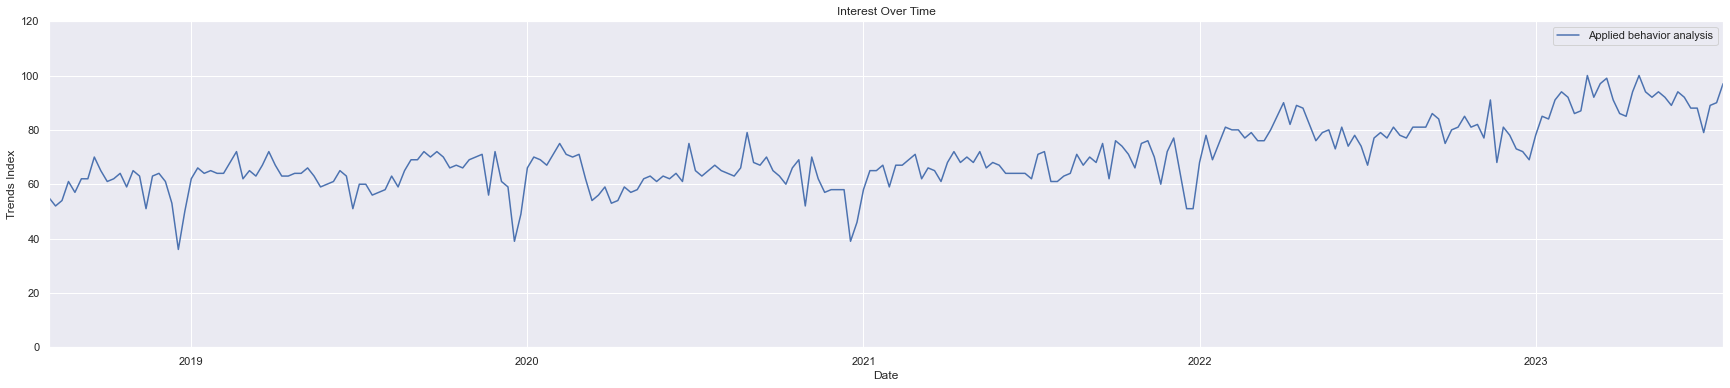

In [77]:
# visualise IOT
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes='true')
dx = pytrends_iot_df.plot.line(figsize= (30,6), title=("Interest Over Time"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
# set the max y limit to 120 for better visualisation
plt.ylim(0, 120) 

### Use Google Trends website data - topic interest over the past 5 years
The following represents the same analysis as above except the data has been manually downloaded from Google's website (https://trends.google.com/trends/explore?date=today%205-y&q=%2Fm%2F05wf1w&hl=en)

Date of query : 28/07/2023





In [13]:
# read the data
site_df = pd.read_csv('ABA google trends/global/GTweb_iot_worldwide.csv')
site_df.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [14]:
# rename the columns with the correct lables
site_df.columns = site_df.iloc[1]
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
0,NaN,NaN
1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52


In [15]:
# remove the first 2 rows on the data set - first row was an empty row and the second row contained the columns lables
site_df = site_df.tail(-2)
site_df.head()

1,Week,Applied behavior analysis: (Worldwide)
2,2018-07-29,56
3,2018-08-05,54
4,2018-08-12,52
5,2018-08-19,54
6,2018-08-26,60


In [16]:
# trends index for Applied behavior analysis is stored as a string/object value
# week date is stored as a string/object value
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Week                                    261 non-null    object
 1   Applied behavior analysis: (Worldwide)  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [17]:
# change type of Trends index for Applied behavior analysis from object to int
site_df = site_df.astype({'Applied behavior analysis: (Worldwide)':'int'})
# change the type of week date data from object to datetime
site_df['Week'] = pd.to_datetime(site_df['Week'])

In [18]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 2 to 262
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Week                                    261 non-null    datetime64[ns]
 1   Applied behavior analysis: (Worldwide)  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

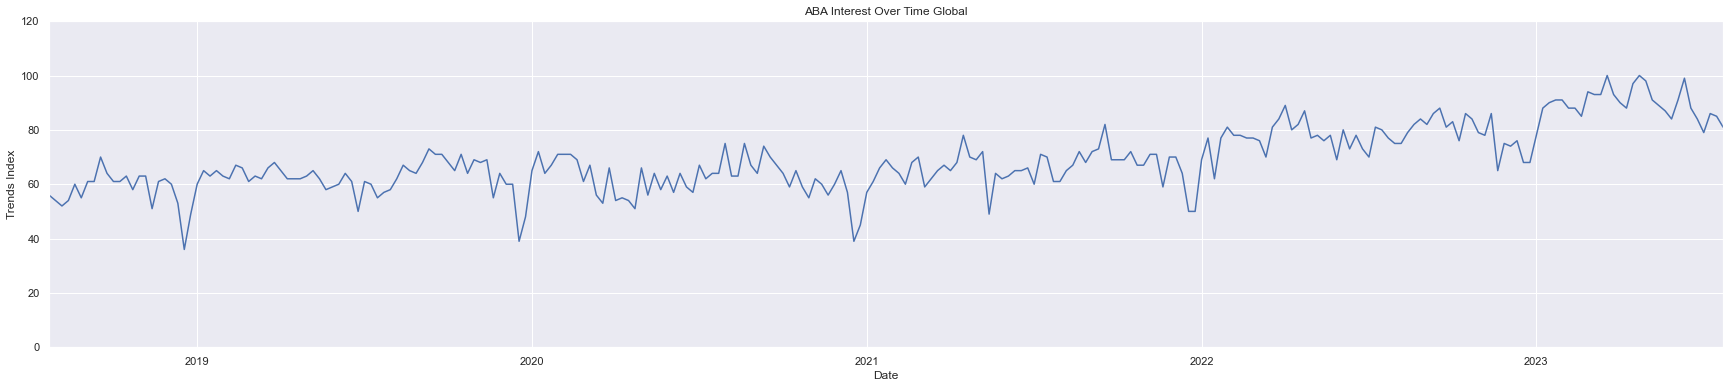

In [123]:
# visualize IOT
site_df = site_df.set_index(site_df['Week'])
dx = site_df['Applied behavior analysis: (Worldwide)'].plot.line(figsize=(30,6), title=("ABA Interest Over Time Global"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

The above code shows discrepancies between the data obtained via pytrends vs. via google's official website. I have failed to find the explanation for why this is the case - apparently the data proivded when making calls as legit-user vs scraper is different (https://stackoverflow.com/questions/73988220/why-google-retrieves-different-info-to-scrapers). Google Trends does not have an official API and thus reliability on 3rd party scraping tools can result in questionalble data. I have thus decided to manually download the data from google'e website direclty - the amount of data sets is small and thus this process is faster than to try to figure out a reliable and efficient method of scraping google trends data (this is out of the scope of the current project).

## Google trends data for queries related to the topic: Applied Behaviour Analysis

Date of query : 28/07/2023
Time frame: past 5 years

Data sets obtained:
1. IOT worldwide - analysis provided above
2. Interest by region (Country) worldwide
3. Related topics - worldwide
4. Related queries - worldwide

5. IOT - UK
6. Interest by region (Country) UK
7. Related topics - UK
8. Related queries - UK

### Interest by region (Country) worldwide


In [24]:
# read file -> we observe there is missing data
ibr_world_df = pd.read_csv('ABA google trends/global/geoMap_global.csv')
ibr_world_df.head()

,Category: All categories
Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN


In [25]:
# rename the columns with the correct lables
ibr_world_df.columns = ibr_world_df.iloc[0]
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN


In [26]:
# remove first row
ibr_world_df = ibr_world_df.tail(-1)
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,NaN
United States,26


In [27]:
# set all NaN values to 0 (= no google trends data for that entry)
ibr_world_df['Applied behavior analysis: (7/28/18 - 7/28/23)'] = ibr_world_df['Applied behavior analysis: (7/28/18 - 7/28/23)'].fillna(0)
ibr_world_df.head()

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
Cayman Islands,0
United States,26


In [28]:
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Uganda to Samoa
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Applied behavior analysis: (7/28/18 - 7/28/23)  250 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [29]:
# change type of Trends index for Applied behavior analysis from object to int
ibr_world_df = ibr_world_df.astype({'Applied behavior analysis: (7/28/18 - 7/28/23)':'int'})
ibr_world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Uganda to Samoa
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Applied behavior analysis: (7/28/18 - 7/28/23)  250 non-null    int64
dtypes: int64(1)
memory usage: 3.9+ KB


In [30]:
# sort countries/regions by trending index
ibr_world_df = ibr_world_df.sort_values(by=['Applied behavior analysis: (7/28/18 - 7/28/23)'], ascending=False)
ibr_world_df.head(10)

Country,Applied behavior analysis: (7/28/18 - 7/28/23)
Uganda,100
Cambodia,63
Nigeria,32
United States,26
Ethiopia,22
Italy,13
Israel,12
Brazil,12
Canada,11
United Arab Emirates,10


Applied behavior analysis seems to be very popular in Uganda and many African countries.However, the data reflects queries related to the topic, not the term, of Applied behavior analysis.
This means data reflects all possible related words, inculding misspellings and acronims. A brief investigation revealed that 2 popular companies in Uganda - one sports betting agency and one ofering financial services - have ABA in their name. This could be acounting for the incresed number of searches using the keyword 'aba' in Uganda.

Uganda 'ABA' companies: https://www.google.com/search?q=aba+uganda&oq=aba+uganda&aqs=chrome.0.69i59j46i175i199i512j0i22i30l2j0i10i22i30j0i22i30l2j69i60.3892j0j4&sourceid=chrome&ie=UTF-8

When a search in Google Trends was made for the search term 'Applied behavior analysis' (this shows just the exact match queries), USA appears to be the region where Applied behavior analysis trends the highest.

Google Trends data for 'Applied behavior analysis' as a search word:
https://trends.google.com/trends/explore?date=today%205-y&q=Applied%20behavior%20analysis&hl=en


Applied behavior analysis' popularity worldwide is not the topic of the current project so this issue will not be investigated further. Google trends data is used in the current project in order to find related key words to 'Applied behavior analysis' - > these are available in the *related queries dataset*. The related words are used to form a word bank of keywords for searching the relevant social media posts from the  Reddit platform.


### Related topics - worldwide

Accodring to Google Trends website Related topics means:

Users searching for your term also searched for these topics. You can view by the following metrics:
* Top - The most popular topics. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Related topics with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these topics are new and had few (if any) prior searches.

In [173]:
# upload data
# data is formated strangely -> see possible sollutions at https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
rt_world_df = pd.read_csv('ABA google trends/global/relatedEntities_topics_global.csv', skiprows=2)
rt_world_df

,TOP
Therapy,100
Behavior,89
Analysis,55
Autistic Spectrum Disorders,24
Licensed behavior analyst,10
Master's Degree,10
Training,9
Salary,9
Psychology,9
Course,9


In [174]:
# select top 25 related topics (maximum Google Trends provided)
rt_world_df_top = rt_world_df.iloc[:25]
rt_world_df_top = rt_world_df_top.reset_index()
rt_world_df_top = rt_world_df_top.rename(columns={"index": "Top related topic World", "TOP": "Trend index"})
rt_world_df_top.head()

,Top related topic World,Trend index
0,Therapy,100
1,Behavior,89
2,Analysis,55
3,Autistic Spectrum Disorders,24
4,Licensed behavior analyst,10


In [175]:
# select rising related topics
rt_world_df_rising = rt_world_df.iloc[25:]
rt_world_df_rising = rt_world_df_rising.reset_index()
rt_world_df_rising = rt_world_df_rising.rename(columns={"index": "Rising related topic World", "TOP": "Trend index"})
rt_world_df_rising = rt_world_df_rising.tail(-1)
rt_world_df_rising.head()

,Rising related topic World,Trend index
1,Autism,Breakout
2,Functional behavior assessment,Breakout
3,Applied science,"+2,450%"
4,Postgraduate education,+200%
5,Therapist,+180%


The data above shows Applied behaviour analysis is commonly related to Therapy and Autistic Spectrum Disorders (see TOP: rt_world_df_top).

It seems that recently there has been a high increase in queries on Autism and Applied behaviour analysis (see RISING: rt_world_df_rising)

### Related queries - worldwide

Accodring to Google Trends website Related queries means:

Users searching for your term also searched for these queries. You can sort by the following metrics:
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* Rising - Queries with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these queries are new and had few (if any) prior searches.



In [176]:
# read data
rq_world_df = pd.read_csv('ABA google trends/global/relatedQueries_search_global.csv', skiprows=2)
# select top 25 related queries/words ( this is the maximum Google Trends provided)
rq_world_df_top = rq_world_df.iloc[:25]
rq_world_df_top = rq_world_df_top.reset_index()
rq_world_df_top.head()

,index,TOP
0,aba,100
1,aba therapy,22
2,behavior analysis,10
3,autism,6
4,what is aba,6


In [177]:
# rename the columns appropriately
rq_world_df_top = rq_world_df_top.rename(columns={"index": "World Top related query word", "TOP": "Trend index"})
rq_world_df_top.head()

,World Top related query word,Trend index
0,aba,100
1,aba therapy,22
2,behavior analysis,10
3,autism,6
4,what is aba,6


In [178]:
# select the rising related queries/words
rq_world_df_rising = rq_world_df.iloc[25:]
rq_world_df_rising = rq_world_df_rising.reset_index()
rq_world_df_rising.head()

,index,TOP
0,RISING,NaN
1,golden steps aba,Breakout
2,ababet ug,Breakout
3,ababet,"+4,750%"
4,aba desk login,"+4,100%"


In [179]:
# rename the columns appropriately
rq_world_df_rising = rq_world_df_rising.rename(columns={"index": "World Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_world_df_rising = rq_world_df_rising.tail(-1)
rq_world_df_rising.head()

,World Rising related query word,search increase
1,golden steps aba,Breakout
2,ababet ug,Breakout
3,ababet,"+4,750%"
4,aba desk login,"+4,100%"
5,the three branches of the science of behavior ...,"+3,350%"


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Applied behavior anlysis'.

The 2 data bases representig global data:
- rq_world_df_rising
- rq_world_df_top

### IOT - UK

In [180]:
# read uk data
iot_uk_df = pd.read_csv('ABA google trends/uk/GTweb_iot_UK.csv')
iot_uk_df.head()

,Category: All categories
Week,Applied behavior analysis: (United Kingdom)
2018-07-29,42
2018-08-05,39
2018-08-12,50
2018-08-19,36


In [181]:
# reset index
iot_uk_df = iot_uk_df.reset_index()
# rename the columns with the correct lables
iot_uk_df.columns = iot_uk_df.iloc[0]
# remove row containing lables
iot_uk_df = iot_uk_df.tail(-1)
iot_uk_df.head()

,Week,Applied behavior analysis: (United Kingdom)
1,2018-07-29,42
2,2018-08-05,39
3,2018-08-12,50
4,2018-08-19,36
5,2018-08-26,37


In [182]:
iot_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 1 to 261
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Week                                         261 non-null    object
 1   Applied behavior analysis: (United Kingdom)  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [183]:
# change Applied behavior analysis: (United Kingdom) type from object to int
iot_uk_df['Applied behavior analysis: (United Kingdom)'] = pd.to_numeric(iot_uk_df['Applied behavior analysis: (United Kingdom)'])
# change week type to datetime
iot_uk_df['Week'] = pd.to_datetime(iot_uk_df['Week'])
iot_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 1 to 261
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Week                                         261 non-null    datetime64[ns]
 1   Applied behavior analysis: (United Kingdom)  261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


(0.0, 120.0)

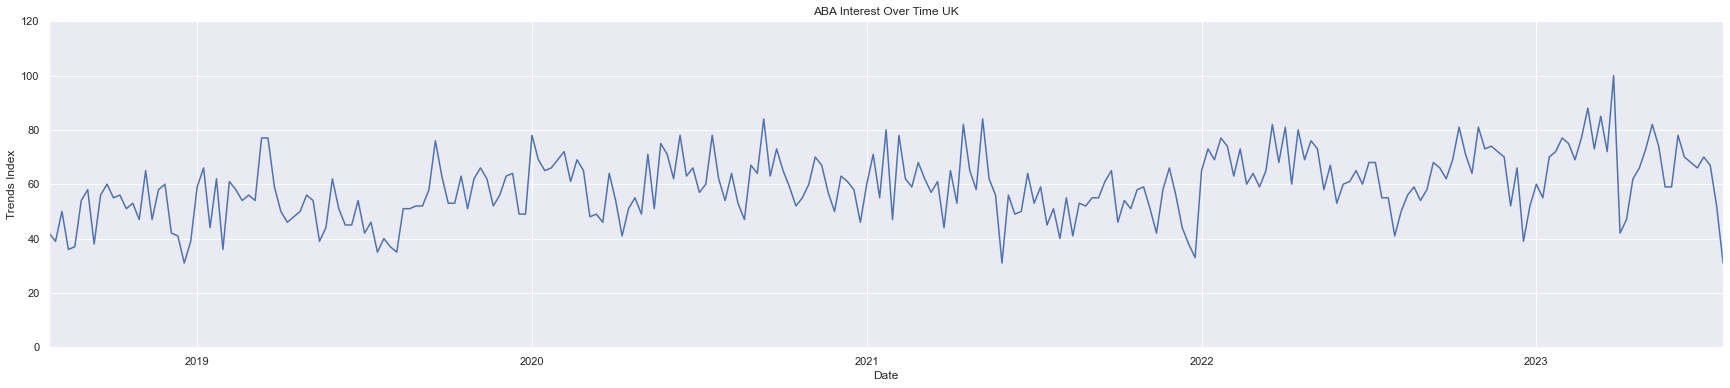

In [184]:
# visualize IOT
iot_uk_df = iot_uk_df.set_index(iot_uk_df['Week'])
dx = iot_uk_df['Applied behavior analysis: (United Kingdom)'].plot.line(figsize=(30,6), title=("ABA Interest Over Time UK"))
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
plt.ylim(0, 120) 

### Interest by region (Country) UK

In [185]:
ibr_uk_df = pd.read_csv('ABA google trends/uk/geoMap_UK.csv')
# rename the columns with the correct lables
ibr_uk_df.columns = ibr_uk_df.iloc[0]
# remove row containing lables
ibr_uk_df = ibr_uk_df.tail(-1)
ibr_uk_df.head()

Region,Applied behavior analysis: (7/28/18 - 7/28/23)
Wales,100
Northern Ireland,89
England,70
Scotland,52


In UK, applied behavior analysis seems to be most popular in Wales, and less so in Scotland.

### Related topics - UK

In [186]:
rt_uk_df = pd.read_csv('ABA google trends/uk/relatedEntities_topics_UK.csv', skiprows=2)
rt_uk_df

,TOP
Therapy,100
Behavior,97
Analysis,71
Autistic Spectrum Disorders,35
coach,18
Training,13
Course,10
Applied science,10
Master's Degree,8
Licensed behavior analyst,7


In [187]:
# select top 25 related topics (maximum Google Trends provided)
rt_uk_df_top = rt_uk_df.iloc[:25]
rt_uk_df_top = rt_uk_df_top.reset_index()
rt_uk_df_top = rt_uk_df_top.rename(columns={"index": "Top related topic UK", "TOP": "Trend index"})
rt_uk_df_top.head()

,Top related topic UK,Trend index
0,Therapy,100
1,Behavior,97
2,Analysis,71
3,Autistic Spectrum Disorders,35
4,coach,18


In [188]:
# select rising 25 related topics (maximum Google Trends provided)
rt_uk_df_rising = rt_uk_df.iloc[25:]
rt_uk_df_rising = rt_uk_df_rising.reset_index()
rt_uk_df_rising = rt_uk_df_rising.rename(columns={"index": "Rising related risingic UK", "TOP": "Trend index"})
rt_uk_df_rising = rt_uk_df_rising.tail(-1)
rt_uk_df_rising.head()

,Rising related risingic UK,Trend index
1,Applied science,Breakout
2,Autism,Breakout
3,Autistic child,Breakout
4,harmful,+950%
5,Technique,+850%


In UK, same as globally, ABA, as a topic, is related to Therapy and Autistic Spectrum Disorders (see TOP: rt_uk_df_top).

Similarly to the global data, UK data shows that recently there has been a high increase in queries on Autism and Applied behaviour analysis. In contrast to the global queries, in UK there is also a high rise in queries about Applied behaviour analysis and the 'harmful' topic (see RISING: rt_world_df_rising). This suggests that in UK people are increasingly concerned about ABA having harmful, negative consequences/effects. 

### Related queries - UK

In [189]:
rq_uk_df = pd.read_csv('ABA google trends/uk/relatedQueries_search_UK.csv', skiprows=2)
rq_uk_df

,TOP
aba,100
aba therapy,24
autism,11
autism aba,11
behaviour,10
behaviour analysis,8
what is aba,7
applied behavior analysis,6
aba tutor,4
applied behaviour analysis,4


In [190]:
# select top 25 related queries/words ( this is the maximum Google Trends provided)
rq_uk_df_top = rq_uk_df.iloc[:25]
rq_uk_df_top = rq_uk_df_top.reset_index()
rq_uk_df_top.head()

,index,TOP
0,aba,100
1,aba therapy,24
2,autism,11
3,autism aba,11
4,behaviour,10


In [191]:
# rename the columns appropriately
rq_uk_df_top = rq_uk_df_top.rename(columns={"index": "UK Top related query word", "TOP": "Trend index"})
rq_uk_df_top.head()

,UK Top related query word,Trend index
0,aba,100
1,aba therapy,24
2,autism,11
3,autism aba,11
4,behaviour,10


In [192]:
# select the rising related queries/words
rq_uk_df_rising = rq_uk_df.iloc[25:]
rq_uk_df_rising = rq_uk_df_rising.reset_index()
rq_uk_df_rising.head()

,index,TOP
0,RISING,NaN
1,aba remote jobs,Breakout
2,ababet ug,Breakout
3,what is stimming,Breakout
4,aba and preach,"+4,650%"


In [193]:
# rename the columns appropriately
rq_uk_df_rising = rq_uk_df_rising.rename(columns={"index": "UK Rising related query word", "TOP": "search increase"})
# drop the first row (this is a column lables row; the columns have already been renamed above)
rq_uk_df_rising = rq_uk_df_rising.tail(-1)
rq_uk_df_rising.head()

,UK Rising related query word,search increase
1,aba remote jobs,Breakout
2,ababet ug,Breakout
3,what is stimming,Breakout
4,aba and preach,"+4,650%"
5,applied business academy,"+2,750%"


The 2 data frames created above will be used as a word bank for related query words related to the topic of 'Applied behavior anlysis'. This word bank will be combined with the one obtained from global searches - any duplcates and irrelevant words/phrases ( for example, the ones related to sports bets and financial services - see Uganda discussion above) will be removed. The word bank thus created will be used to match relevant social media posts from the social media platform Reddit.

The 2 data bases representig UK data:
- rq_uk_df_rising
- rq_uk_df_top

## Creating the (ABA) queries wordbank 

In [202]:
# print(rq_world_df_top, rq_world_df_rising , rq_uk_df_top, rq_uk_df_rising ,  sep='\n\n')

In [212]:
# save query words into a csv file
with open("aba_wordbank.csv", "w") as file:
    # write data to file
    for word in rq_world_df_top['World Top related query word']:
        file.write(f'{word}\n')
with open("aba_wordbank.csv", "a") as file:
    # append data to file
    for word in rq_world_df_rising['World Rising related query word']:
        file.write(f'{word}\n')
    for word in rq_uk_df_top['UK Top related query word']:
        file.write(f'{word}\n')
    for word in rq_uk_df_rising['UK Rising related query word']:
        file.write(f'{word}\n')

The file obtained from agregating together the search terms from global and UK databases ( see above code ) was manually reviewed and irrelevant terms were removed ( see file comments for details regarding the decision process ). The resulting final query words/phrases can be found in the aba_wordbank_final.csv file

In [225]:
# read the final wordbank file and save into a set ( to remove any duplicates )
wordbank_set = set()
with open("aba_wordbank_final.csv", "r") as file:
    # append data to file
    for word in file:
        wordbank_set.add(word.strip())

wordbank_set

{'aba school,',
 'aba therapist,',
 'aba therapy,',
 'aba training,',
 'aba tutor,',
 'aba,',
 'applied behavior analysis,',
 'applied behaviour analysis,',
 'behavior analysis,',
 'behavior analyst,',
 'behavioral analysis,',
 'behaviour analysis,',
 'behavioural analysis,',
 'behavioural,'}